In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import sys
import os

#from yahoo_fin.stock_info import *
#from yahoo_fin.stock_info import get_data

import yfinance as yf

from scipy.stats import skew, skewtest

sys.path.append("..") 
from tp_utils import daily_returns
from tp_config import *

In [2]:
start_date = datetime.datetime(2009,1,1)
end_date = datetime.date.today()

data_path = DATA_PATH_SHARES

etoro_energy = ['A2A.MI', 'ATC.AS', 'AEE', 'AEP', 'ALB', 'ATO', 'AWK', 'BCPT.L', 'BRW.L', 'BWLPG.OL',
               'CCC.L', 'CIG', 'CMS', 'CNA.L', 'CNP', 'CVA',
               'D', 'DANSKE.CO', 'DC.L', 'DRI.DE', 'DTE', 'DUK',
                'ED', 'EDF.PA', 'EIX', 'ELE.MC', 'ELISA.HE', 'ENEL.MI', 'ENG.MC', 'ENGI.PA', 'ENS', 'EOAN.DE', 'ES', 'ETR', 'EVA', 'EVRG', 'EXC',
                'FE', 'FGP.L', 'FORTUM.HE', 'GLO.L', 'GVC.L', 'HER.MI', 'IBE.MC', 'IG.MI', 'IGY.DE', 'ILD.PA', 'IRE.MI', 'LEO.DE', 'LNT',
               'MPC', 'MRC.L', 'NEE', 'NEP', 'NG.L', 'NI', 'NMC.L', 'NTGY.MC', 'NVTK.IL', 'OGZD.IL', 'OKE', 'ORA', 
                'PAM', 'PCG', 'PDL.L', 'PEG', 'PEGI', 'PPL', 'PSX']
assets = ['sp', 'msft', 'nflx', 'dis', 'ntdoy', 'goog', 'fb', 'amzn', 'lyft', 'rtn', 'gold', 'yndx', 'sber.me', 'ba', 'baba', 'cpri', 'lmt']    


def get_ticker_data(ticker, start_date = None, end_date = None):
    df = yf.download(ticker, start_date, end_date)
    return df
    
tickers = assets + etoro_energy
for ticker in tickers:
    print (ticker)
    df = get_ticker_data(ticker, start_date)
    df.to_csv(os.path.join(data_path, ticker.upper() +'.csv'))

print("All Done")

sp
[*********************100%***********************]  1 of 1 completed
msft
[*********************100%***********************]  1 of 1 completed
nflx
[*********************100%***********************]  1 of 1 completed
dis
[*********************100%***********************]  1 of 1 completed
ntdoy
[*********************100%***********************]  1 of 1 completed
goog
[*********************100%***********************]  1 of 1 completed
fb
[*********************100%***********************]  1 of 1 completed
amzn
[*********************100%***********************]  1 of 1 completed
lyft
[*********************100%***********************]  1 of 1 completed
rtn
[*********************100%***********************]  1 of 1 completed
gold
[*********************100%***********************]  1 of 1 completed
yndx
[*********************100%***********************]  1 of 1 completed
sber.me
[*********************100%***********************]  1 of 1 completed
ba
[*********************100%***********

In [30]:
etoro_energy.values()

dict_values(['A2A.MI', 'ATC.AS', 'aee', 'aep', 'alb'])

In [9]:
#Instrument blocks
instrument_blocks = {'sp' : 50, 'nflx': 50}

In [11]:
#Correlation calculate

shares = ['sp', 'msft', 'nflx', 'dis', 'ntdoy', 'goog', 'fb', 'amzn', 'rtn', 'gold', 'yndx', 'ba', 'cpri', 'lmt']
shares = ['dis', 'msft', 'ba', 'rtn']
shares = ['sp', 'nflx',  'ntdoy', 'goog', 'fb', 'amzn', 'gold', 'yndx', 'cpri', 'lmt']


df_dret = []
for asset in shares:
    df = pd.read_csv(data_path + '/' + asset +'.csv')
    dret = daily_returns(df['adjclose'])
    df_dret.append(dret)

    
df_dret = pd.DataFrame(df_dret)
df_dret = df_dret.transpose()
df_dret.columns = shares
corr = df_dret.iloc[:1000].corr()
print(len(shares))
print(abs(corr).sum())
abs(corr)


NameError: name 'pd' is not defined

## Skew test

In [163]:
skew_list = []
for asset in shares:
    df = pd.read_csv(data_path + '/' + asset +'.csv')
    dret = daily_returns(df['adjclose'])
    asset_skew = skew(dret)
    print('%6s %0.3f' % (asset,asset_skew))
    skew_list.append([asset, asset_skew]) 

df_skew = pd.DataFrame(skew_list)    
df_skew.columns = ['asset', 'skew']

    sp 0.019
  msft 0.034
  nflx 0.916
   dis 0.306
 ntdoy 1.938
  goog 0.756
    fb 1.265
  amzn 1.276
  lyft -0.536
   rtn 0.023
  gold -0.010
  yndx -0.135
    ba -0.026
  baba 0.228
  cpri 1.048


In [164]:
skew_treshold = 0.15
df_skew[df_skew['skew'] > skew_treshold]

,asset,skew
2,nflx,0.915824
3,dis,0.306172
4,ntdoy,1.937878
5,goog,0.756359
6,fb,1.265273
7,amzn,1.275621
13,baba,0.228099
14,cpri,1.047706


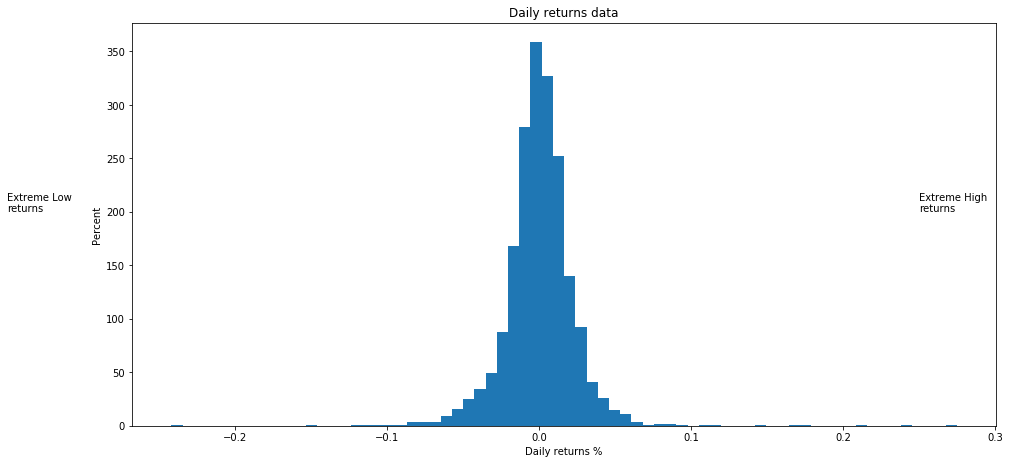

In [13]:
fig = plt.figure( figsize = (15, 7))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
dret.plot.hist(bins = 70)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

## END